## Run LISFLOOD with BMI sample model

In [24]:
%matplotlib inline
from bmi.wrapper import BMIWrapper
import matplotlib.pyplot as plt
import numpy as np

BMI is all about interacting with the states, fluxes and parameters within runtime. So let's start by adding a bunch of water after one time step somewhere in the middle of our test domain, and see how that spreads in the first 100 days of simulation

In [25]:
wrapper = BMIWrapper(engine="lisflood", configfile='/home/hcwinsemius/git/barotse/example_models/LFP_synthetic_2D/LFP_syntheticTestCase_2D.par')
wrapper.initialize()
# do one time step
wrapper.update()
# add a bunch of water in the middle (y-coord 250 is the middle)
h = wrapper.get_var('H')
h[250, :] += 3.
# wrapper.get_var('H')[:] = h

The model domain looks like a small thin hillslope with a constant slope from the lower part to the upper part. Let's test the BMI functionality of lisflood here. We noticed that the timestep retrieved from .get_time_step is fixed on what is given in the .par file, whilst it should be updated dynamically. So we compute this from the per time step change. We also make a super simple plot of the water level outputs, aftger one day is passed, two days, 3, 4, 5 etc. and see if that gives expected results.

Time step size is 600.000000 seconds
Time step size is 168.213185 seconds
Time step size is 189.821880 seconds
Time step size is 203.313362 seconds
Time step size is 213.194366 seconds
Time step size is 221.044617 seconds
Time step size is 227.552786 seconds
Time step size is 233.123104 seconds
Time step size is 238.001585 seconds
Time step size is 242.325875 seconds
Time step size is 246.237363 seconds
Time step size is 249.792949 seconds
Time step size is 253.067039 seconds
Time step size is 256.090152 seconds
Time step size is 258.914869 seconds
Time step size is 261.552506 seconds
Time step size is 264.030227 seconds
Time step size is 266.377884 seconds
Time step size is 268.599508 seconds
Time step size is 270.717354 seconds
Time step size is 272.734492 seconds
Time step size is 274.656822 seconds
Time step size is 276.505801 seconds
Time step size is 278.276770 seconds
Time step size is 279.986575 seconds
Time step size is 281.628587 seconds
Time step size is 283.216020 seconds
T

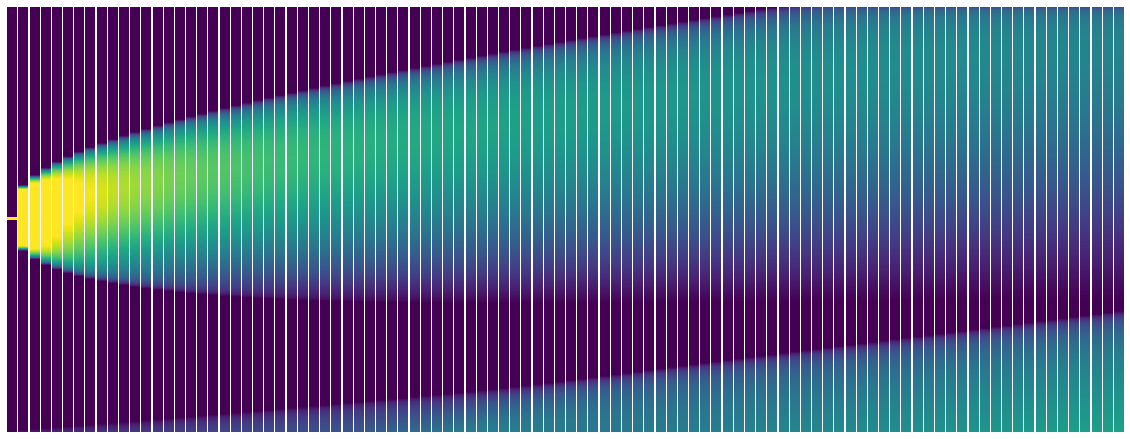

In [26]:
t = 0 # is the moment in time that we want to plot something. After each plot we increase this by 86400 seconds (one day)
t1 = 0
p = 0  # plot number (let's do 100 plots for now)
volume = []
h_timeseries = []  # start empty list where we store daily water depths
plt.figure(figsize=(20, 10))
while p < 100:
    # read current time
    t2 = wrapper.get_current_time()
    timestep = t2 - t1
    t1 = t2
    wrapper.update()
    if wrapper.get_current_time()> t:
        volume.append(wrapper.get_var('H').sum())
        # we passed t, so let's plot something
        print('Time step size is {:f} seconds'.format(timestep))
        p += 1 # we increase the plot number by one
        t += 86400 # we add one day to go to the next day
        plt.subplot(1, 100, p, frameon=False)
        plt.imshow(wrapper.get_var('H'), vmin=0., vmax=.8)
        h_timeseries.append(wrapper.get_var('H').copy())

        plt.xticks([])
        plt.yticks([])
# 100 days have passed. We're done, so we close the model
wrapper.finalize()
# make a volume array and plot that as well


Text(0, 0.5, 'volumetric measure --')

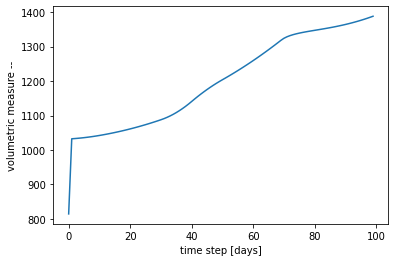

In [27]:
f = plt.figure()
volume = np.array(volume)
plt.plot(volume)
plt.xlabel('time step [days]')
plt.ylabel('volumetric measure --')

so we clearly see the water moving through the domain. The upper side of the domain is the lowest part of the hillslope, so clearly that's where our 3 meters of water went to. We also see the upper boundaryu condition (bottom of graph) seeping through to the lower part of the domain. So great! we can interfere with the model in runtime!


finally, let's check if we can also use xarray to collect results and interactively per time step display it with hvplot. You need to install pyviz, hvplot, datashader

conda install pyviz, hvplot, datashader



In [28]:
import xarray as xr
import numpy as np
import pandas as pd
import hvplot.xarray
h_timeseries = np.array(h_timeseries).transpose([0, 2, 1])
_t, _x, _y = h_timeseries.shape
time = pd.date_range('2000-01-01', periods=_t)
x = np.arange(_x)
y = np.arange(_y)

da = xr.DataArray(h_timeseries,
                  dims=('time', 'x', 'y'),
                  coords={'time': time,
                          'x': x,
                          'y': y
                         }
                 )
da.hvplot.quadmesh('x', 'y', cmap='viridis', rasterize=True, dynamic=True, frame_width=50, data_shade=True, clim=(0., 0.5))


:DynamicMap   [time]
   :Image   [x,y]   (value)